In [5]:
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

In [2]:
## we need langchain as langgraph is built on it and it is good to reuse some stuff from it
load_dotenv()

True

In [19]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]] ## allows us to store either AI or Human Message in messages


llm = ChatOpenAI(model="gpt-4.1-mini", 
                 temperature=0.5, 
                 max_tokens=100)

def process_node(state: AgentState) -> AgentState:
    """ This node will do solve the request you input """
    
    response = llm.invoke(state["messages"])
    
    state["messages"].append(AIMessage(content=response.content))
    print(f"\n AI: {response.content}")
    print("CURRENT STATE: ", state["messages"])
    # print(state['messages'])
    return state


graph = StateGraph(AgentState) 
graph.add_node("proces", process_node)
graph.add_edge(START, "proces")
graph.add_edge("proces", END)
agent = graph.compile()

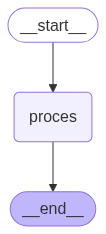

In [20]:
agent

In [21]:
agent.invoke({"messages": [HumanMessage(content="Hi, I am Sahil")]})


 AI: Hello Sahil! How can I assist you today?
CURRENT STATE:  [HumanMessage(content='Hi, I am Sahil', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Sahil! How can I assist you today?', additional_kwargs={}, response_metadata={})]


{'messages': [HumanMessage(content='Hi, I am Sahil', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello Sahil! How can I assist you today?', additional_kwargs={}, response_metadata={})]}

In [ ]:
## This is called as Short-term or Session memory
conversation_history=[]

user_input = input("Enter: ")
while user_input!="exit":
    conversation_history.append(HumanMessage(content=user_input))
    result = agent.invoke({"messages": conversation_history})
    print(result["messages"])
    conversation_history = result["messages"]
    user_input=input("Enter: ")


 AI: Hello! How can I assist you today?
CURRENT STATE:  [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})]
[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})]

 AI: Hi Sahil! I'm ChatGPT, an AI language model here to help you. How can I assist you today?
CURRENT STATE:  [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='I am sahil  u ?', additional_kwargs={}, response_metadata={}), AIMessage(content="Hi Sahil! I'm ChatGPT, an AI language model here to help you. How can I assist you today?", additional_kwargs={}, response_metadata={})]
[HumanMessage(content='Hi', additional_kwargs={}, response_metadata=

In [23]:
conversation_history

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I am sahil  u ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hi Sahil! I'm ChatGPT, an AI language model here to help you. How can I assist you today?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="What's my name ?", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Your name is Sahil. How can I help you today?', additional_kwargs={}, response_metadata={})]

In [24]:
### We can use vectorDB for a Longterm memory